# Research of advertisements for the sale of apartments

At your disposal are data from the Yandex Estate service - an archive of advertisements for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate. Your job is to set the parameters. This will allow you to build an automated system: it will track anomalies and fraudulent activity.

For each apartment for sale, two types of data are available. The first ones are entered by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the center, airport, nearest park and pond.

### Opening the data file and review the general information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv('real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', 50)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

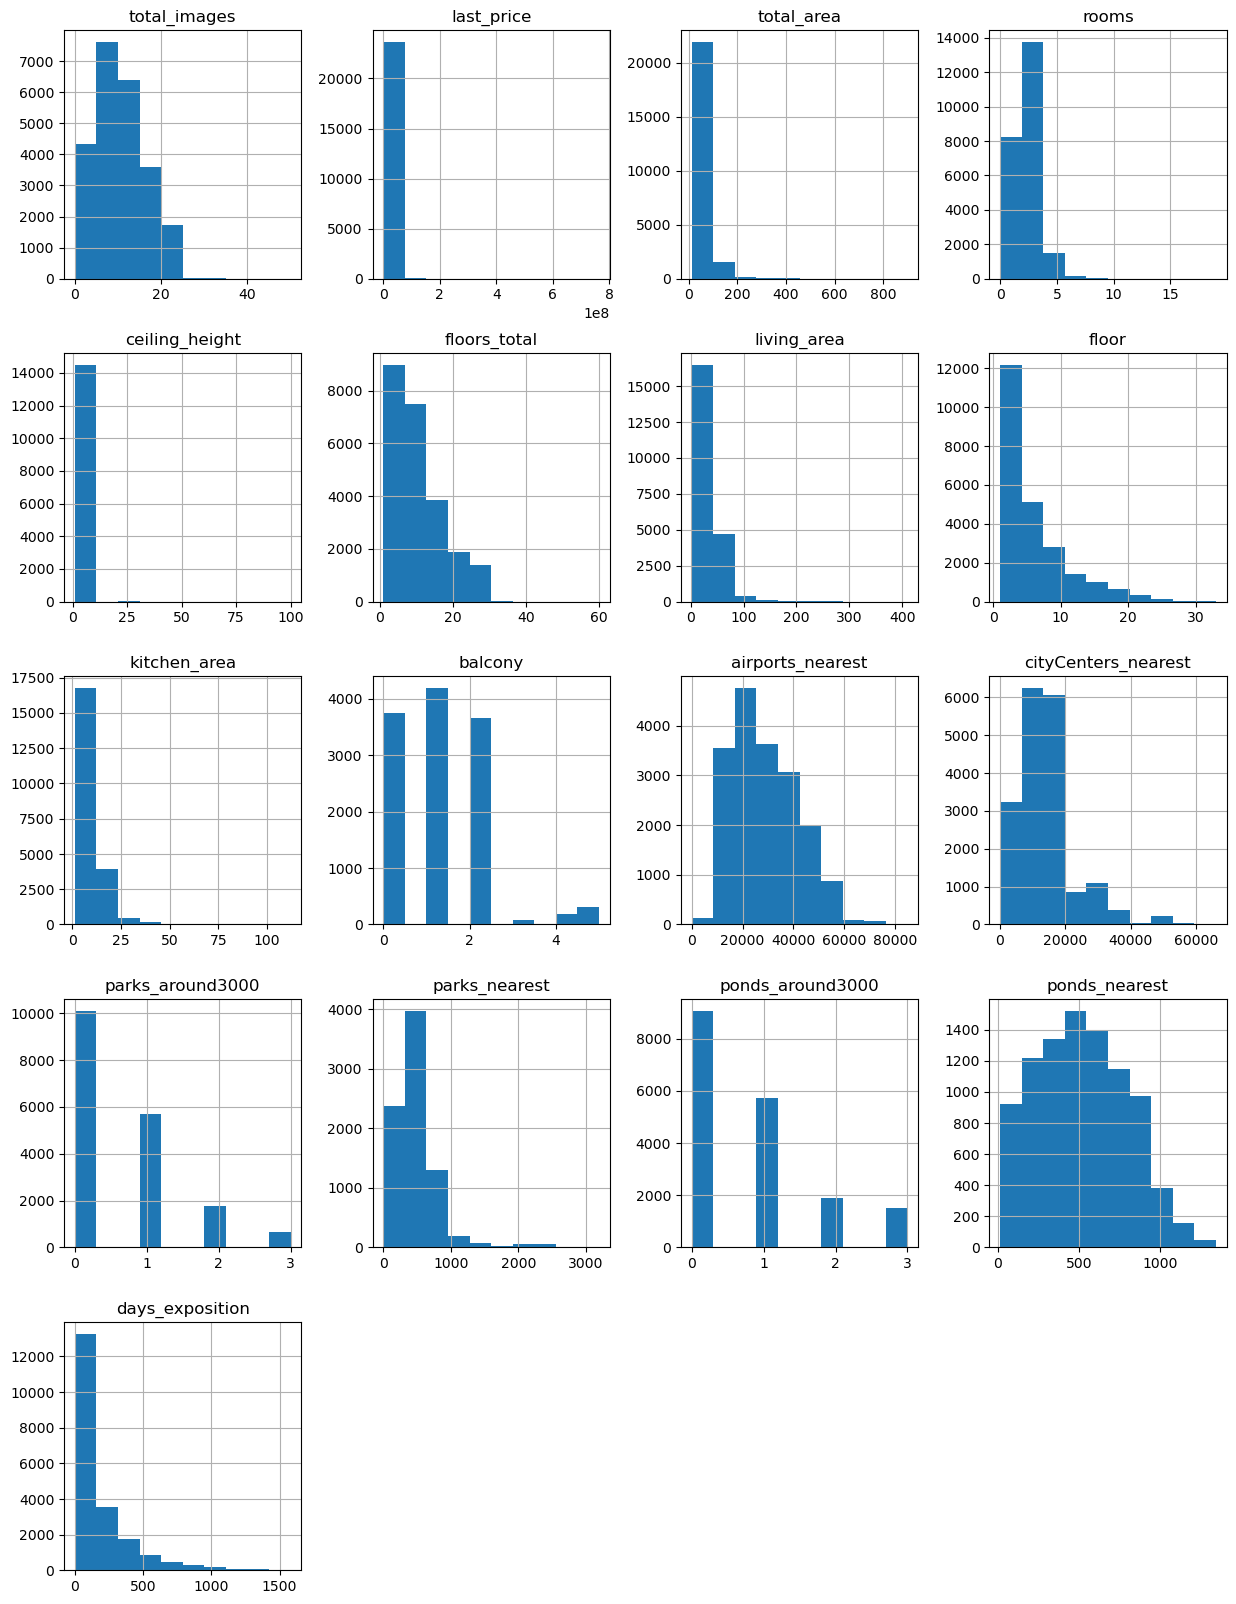

In [3]:
data.hist(figsize=(15, 20))

**Conclusion**
1. There are too many gaps in is_apartment, and it should also be of bool type.
2. You need to change the data type in last_price, total_area, floors_total, balcony, parks_around3000, ponds_around3000 and days_exposition to int

### Data preprocessing

In [4]:
data['last_price'] = data['last_price'].astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].median())
data=data.query('2<ceiling_height<4')
data['floors_total']=data['floors_total'].fillna(data['floors_total'].median())
data['floors_total'] = data['floors_total'].astype(int)
data['is_apartment'] = data['is_apartment'].fillna(value=False)
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype(int)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype(int)
data['days_exposition']=data['days_exposition'].fillna(10000).astype('int')
living_ratio = data['living_area'].median() / data['total_area'].median()
kitchen_ratio = data['kitchen_area'].median() / data['total_area'].median()
data['living_area']=data['living_area'].fillna(living_ratio * data['total_area'])
data['jitchen_area']=data['kitchen_area'].fillna(kitchen_ratio * data['total_area'])
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2261
balcony                     0
locality_name              48
airports_nearest         5512
cityCenters_nearest      5492
parks_around3000            0
parks_nearest           15558
ponds_around3000            0
ponds_nearest           14532
days_exposition             0
jitchen_area                0
dtype: int64

**Conclusion**

Where possible, missing data were removed and extreme values were excluded.

1. Removed data gaps
2. Eliminated outlier values in ceiling_heights
3. We brought first_day_exposition to a clear format.

### Count and add new columns to the table

In [5]:
data['price_per_square_meter'] = data['last_price']/data['total_area']
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')

data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
data['floor_category'] = data.apply(floor_category, axis = 1)
data['floor_category']=data['floor_category'].fillna('неизвестно')

data['cityCenters_km']=data['cityCenters_nearest']/1000
data['cityCenters_km']=round(data['cityCenters_km'])
data['cityCenters_km'] = data['cityCenters_km'].fillna(1000).astype('int')

### Conduct exploratory data analysis

**1. Research: total area;
living space;
kitchen area;
price of the object;
number of rooms;
ceiling height;
apartment floor;
apartment floor type (“first”, “last”, “other”);
the total number of floors in the house;
distance to the city center in meters;
distance to the nearest airport;
distance to the nearest park;
day and month of publication of the advertisement.**

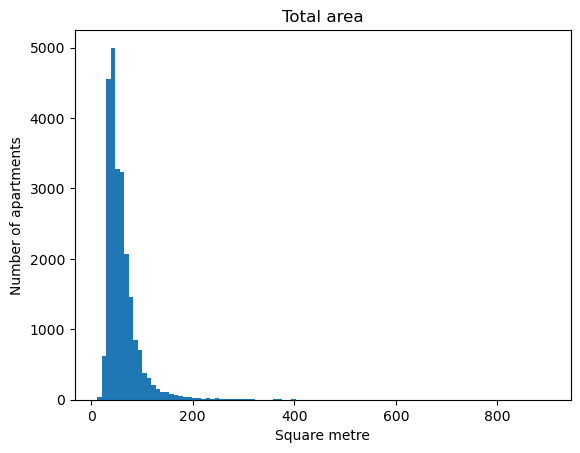

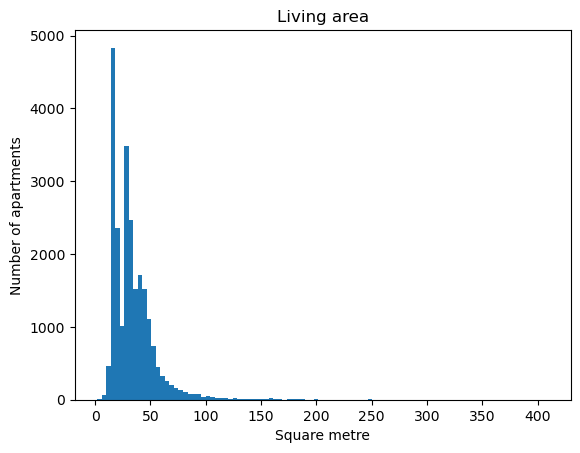

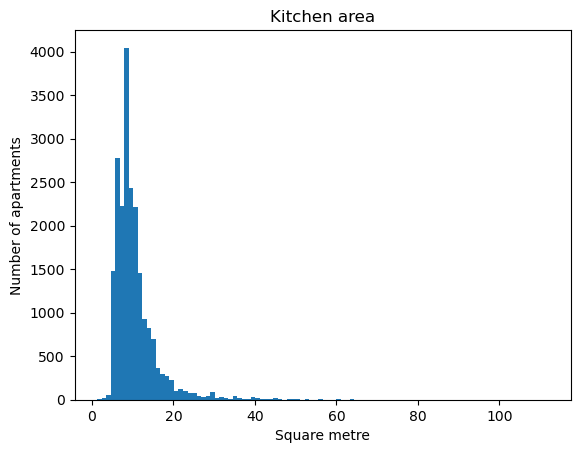

In [6]:
plt.hist(data['total_area'], bins=100)
plt.title('Total area')
plt.xlabel('Square metre')
plt.ylabel('Number of apartments')
plt.show()

plt.hist(data['living_area'], bins=100)
plt.title('Living area')
plt.xlabel('Square metre')
plt.ylabel('Number of apartments')
plt.show()

plt.hist(data['kitchen_area'], bins=100)
plt.title('Kitchen area')
plt.xlabel('Square metre')
plt.ylabel('Number of apartments')
plt.show()

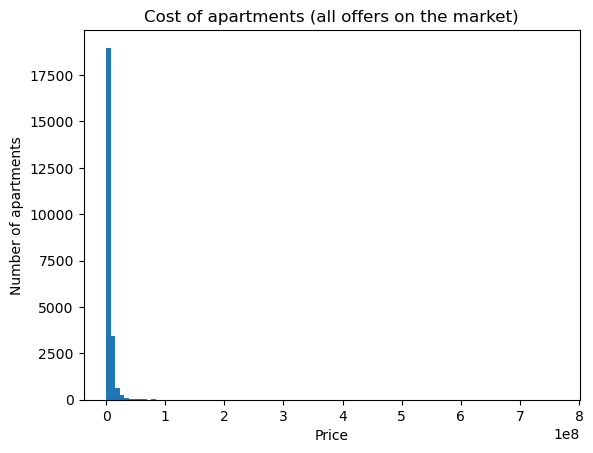

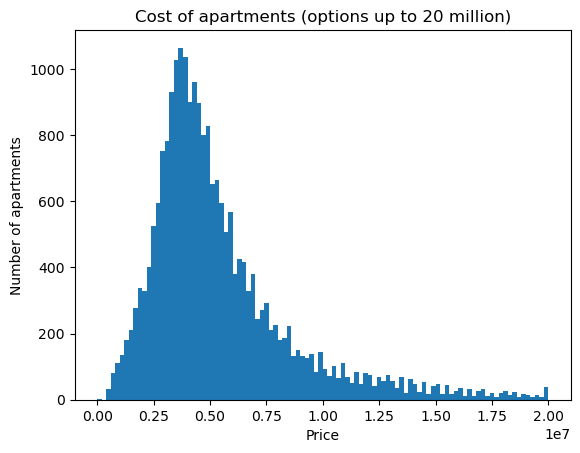

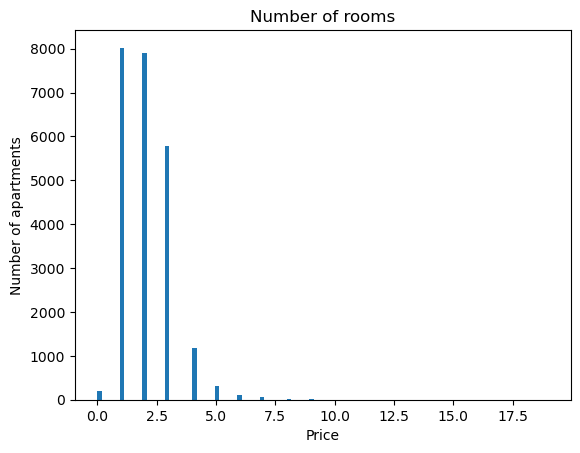

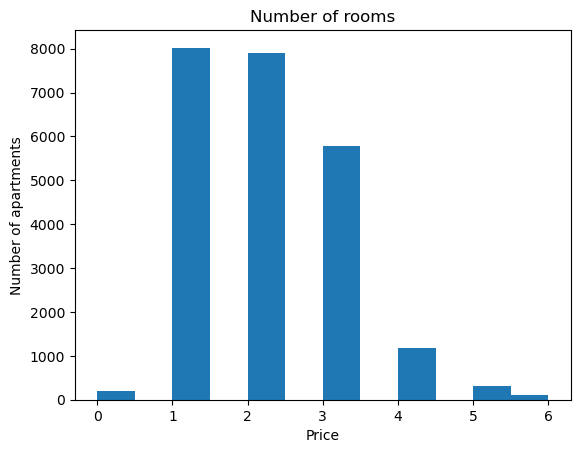

In [7]:
plt.hist(data['last_price'], bins=100)
plt.title('Cost of apartments (all offers on the market)')
plt.xlabel('Price')
plt.ylabel('Number of apartments')
plt.show()

plt.hist(data['last_price'], bins=100, range=(0, 20000000))
plt.title('Cost of apartments (options up to 20 million)')
plt.xlabel('Price')
plt.ylabel('Number of apartments')
plt.show()


plt.hist(data['rooms'], bins=100)
plt.title('Number of rooms')
plt.xlabel('Price')
plt.ylabel('Number of apartments')
plt.show()

plt.hist(data['rooms'], bins=12, range= (0, 6))
plt.title('Number of rooms')
plt.xlabel('Price')
plt.ylabel('Number of apartments')
plt.show()

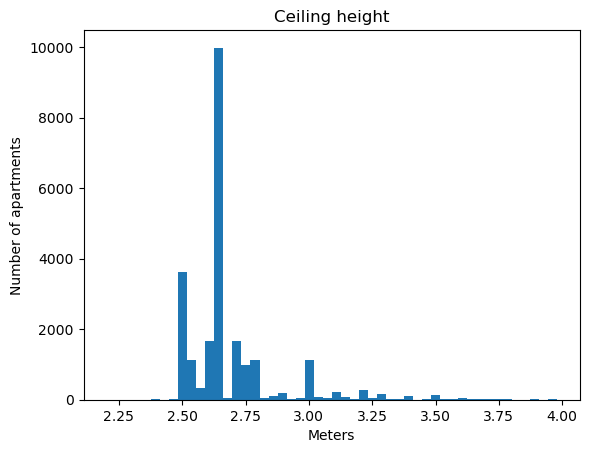

In [8]:
plt.hist(data['ceiling_height'], bins=50)
plt.title('Сeiling height')
plt.xlabel('Meters')
plt.ylabel('Number of apartments')
plt.show()

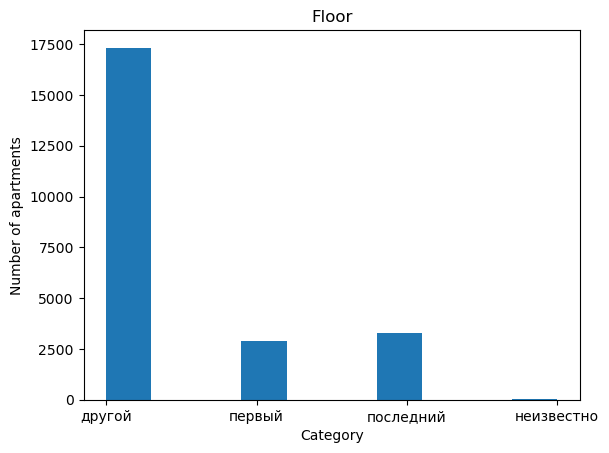

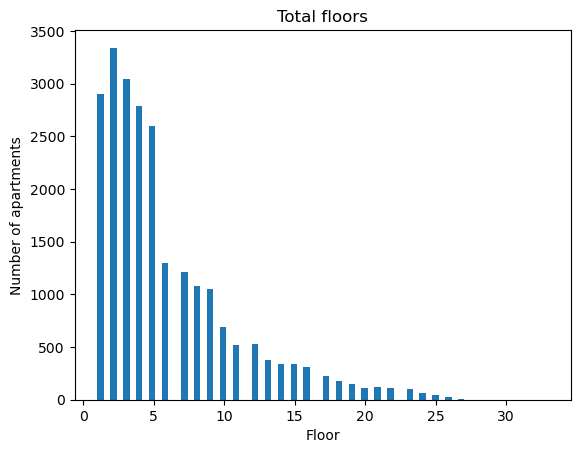

In [9]:
plt.hist(data['floor_category'], bins=10)
plt.title('Floor')
plt.xlabel('Category')
plt.ylabel('Number of apartments')
plt.show()

plt.hist(data['floor'], bins=70)
plt.title('Total floors')
plt.xlabel('Floor')
plt.ylabel('Number of apartments')
plt.show()

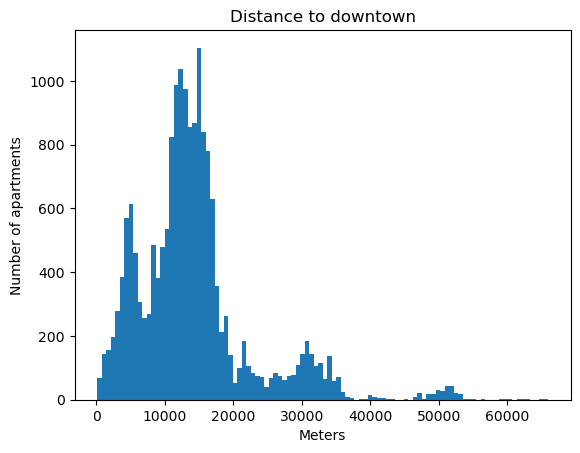

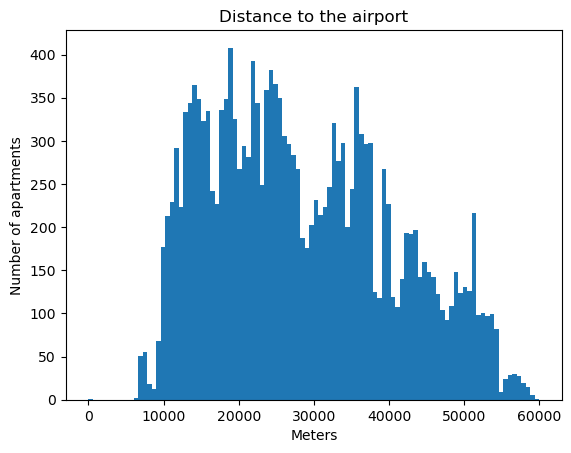

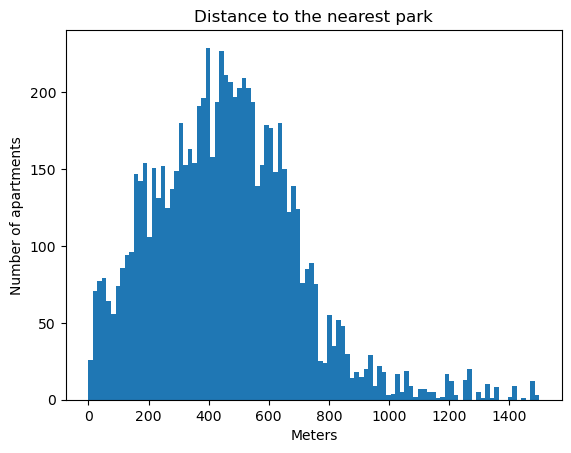

In [10]:
plt.hist(data['cityCenters_nearest'], bins=100)
plt.title('Distance to downtown')
plt.xlabel('Meters')
plt.ylabel('Number of apartments')
plt.show()

plt.hist(data['airports_nearest'], bins=100, range=(0, 60000))
plt.title('Distance to the airport')
plt.xlabel('Meters')
plt.ylabel('Number of apartments')
plt.show()

plt.hist(data['parks_nearest'], bins=100, range=(0, 1500))
plt.title('Distance to the nearest park')
plt.xlabel('Meters')
plt.ylabel('Number of apartments')
plt.show()

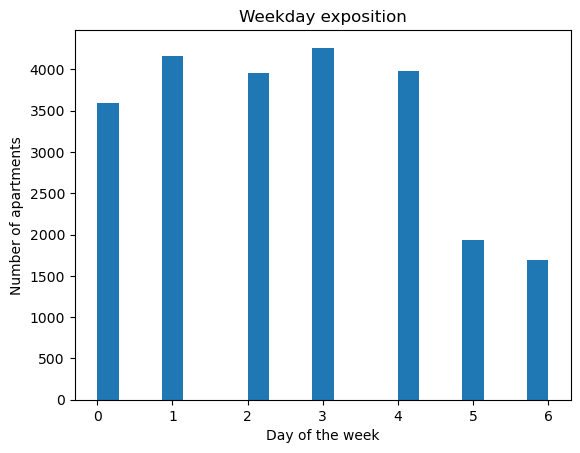

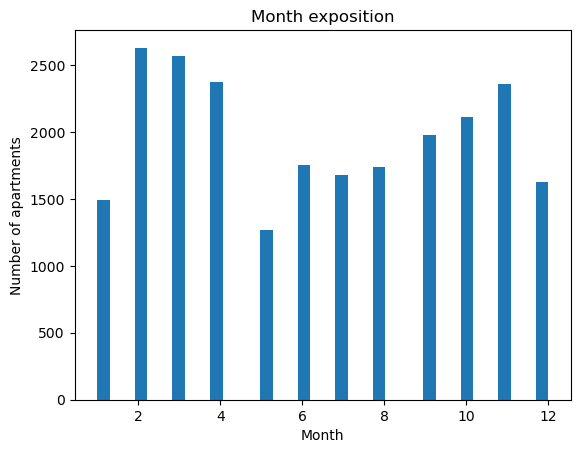

In [11]:
plt.hist(data['weekday_exposition'], bins=21)
plt.title('Weekday exposition')
plt.xlabel('Day of the week')
plt.ylabel('Number of apartments')
plt.show()

plt.hist(data['month_exposition'], bins=36)
plt.title('Month exposition')
plt.xlabel('Month')
plt.ylabel('Number of apartments')
plt.show()

In [12]:
data['floor'].describe()

count    23571.000000
mean         5.899835
std          4.889359
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

**Conclusion**

1. The total area ranges from 12 to 900 square meters. m., the average value is 60, and the median is 52 sq. m. m.
2. Real estate prices have an average value of 6.5 million rubles, a median of 4.6 million rubles.
3. The number of rooms ranges from 1 to 19. Most of them are one-room and two-room apartments.
4. The average ceiling height is 2.7 m, the median is 2.65 m.
5. The market is dominated by low-rise buildings (up to 6 floors inclusive).
6. Most apartments are located within 20 km from the city center, with a minimum distance from Pulkovo Airport - 10 km.
7. Most often, advertisements are posted on weekdays.
8. According to the months of placement, seasonality is visible - drawdown in December-January and in the summer.

**2. Research how quickly apartments sold (days_exposition column). This parameter shows how many days each ad was posted**
Plot a histogram.
Calculate the mean and median.
In a markdown cell, describe how long a sale typically takes. Which sales can be considered quick and which take an unusually long time?

Sales time (median): 95 

Sales time (average): 181 



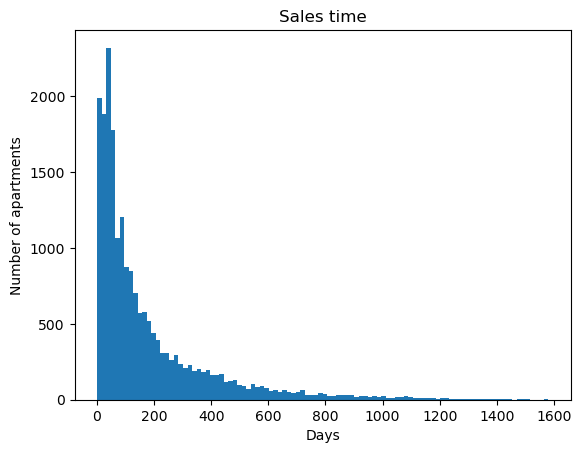

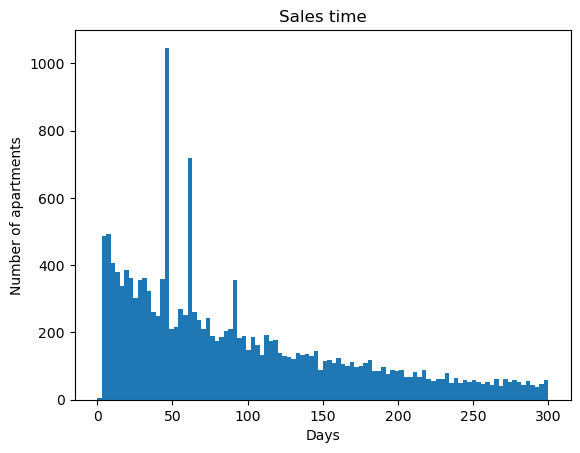

days_exposition
10000    3151
45        878
60        536
7         232
30        207
90        204
4         176
3         158
5         152
14        145
9         143
20        139
8         138
44        138
11        135
Name: count, dtype: int64

In [13]:
print('Sales time (median):', round(data.query('days_exposition != 10000')['days_exposition'].median()),'\n')
print('Sales time (average):', round(data.query('days_exposition != 10000')['days_exposition'].mean()),'\n')

plt.hist(data.query('days_exposition != 10000')['days_exposition'], bins=100)
plt.title('Sales time')
plt.xlabel('Days')
plt.ylabel('Number of apartments')
plt.show()

plt.hist(data.query('days_exposition != 10000')['days_exposition'], bins=100, range=(0, 300))
plt.title('Sales time')
plt.xlabel('Days')
plt.ylabel('Number of apartments')
plt.show()

data.query('days_exposition != 10000')['days_exposition'].describe()
data['days_exposition'].value_counts().head(15)

**Conclusion**

The histogram is a Poisson distribution. The mean is 181 days and the median is 95 days. By examining the chart and using the value_counts method, you can see that the most common values ​​are 45, 60, 7, 30 and 90 days. Having looked at the Yandex.Real Estate conditions for placement, we realized that these days are free restrictions for different regions. Consequently, quite a lot of ads are removed when the free posting period ends.

**3. What factors most influence the total (full) cost of the property?**

**Dependance on total area**

0.296


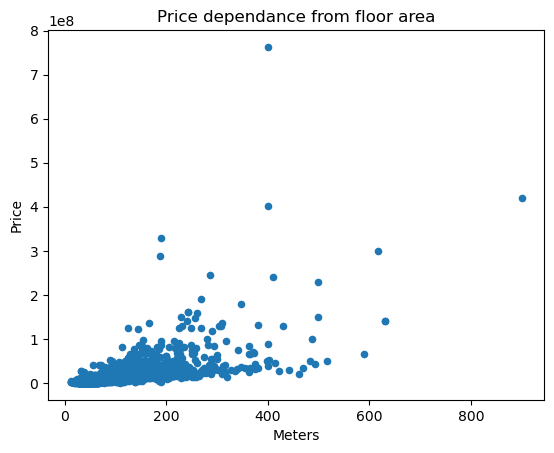

In [14]:
data.plot(x='total_area', y='last_price', kind='scatter')
plt.title('Price dependance from floor area')
plt.xlabel("Meters")
plt.ylabel("Price")
print(round (data['total_area'].corr(data['price_per_square_meter']), 3))
plt.show()

**Conclusion**

The Pearson correlation is 0.3, which indicates a weak dependence

**Dependance on living area**

0.223


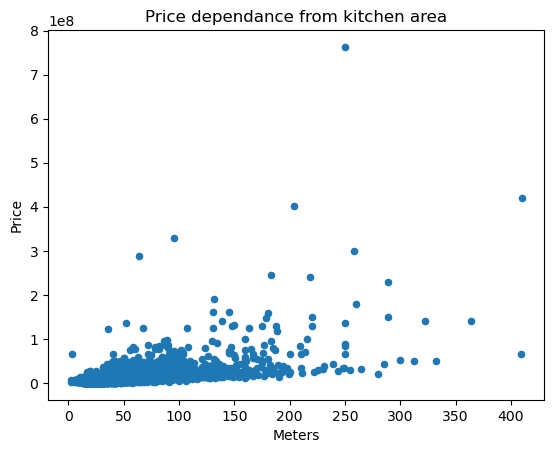

In [15]:
data.plot(x='living_area', y='last_price', kind='scatter')
plt.title('Price dependance from kitchen area')
plt.xlabel("Meters")
plt.ylabel("Price")
print(round (data['living_area'].corr(data['price_per_square_meter']), 3))
plt.show()

**Conclusion**

The Pearson correlation is 0.22, which indicates a weak dependence

**Dependance on kitchen area**

0.394


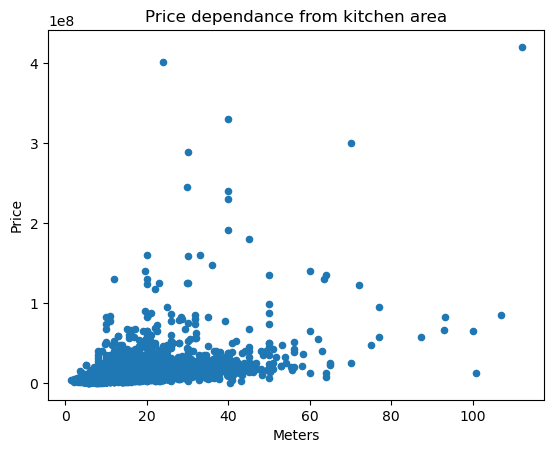

In [16]:
data.plot(x='kitchen_area', y='last_price', kind='scatter')
plt.title('Price dependance from kitchen area')
plt.xlabel("Meters")
plt.ylabel("Price")
print(round (data['kitchen_area'].corr(data['price_per_square_meter']), 3))
plt.show()

**Conclusion**

The Pearson correlation is 0.39, which indicates a weak dependence

**Dependance on the number of rooms**

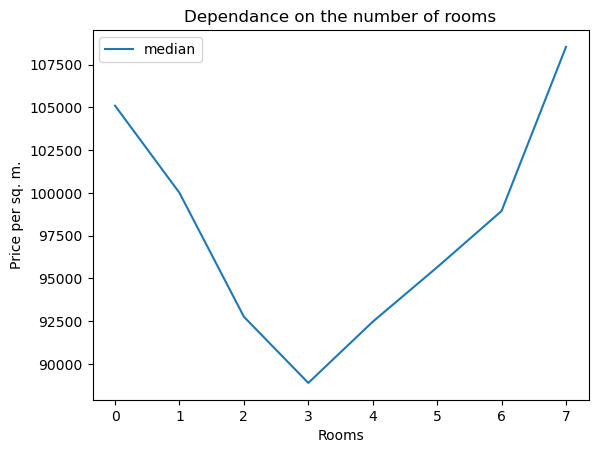

In [17]:
table_rooms = data.pivot_table(index = 'rooms', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
table_rooms.columns = ['mean', 'count', 'median']
table_rooms.query('count > 20').plot(y = 'median')

table_rooms.query('count > 20').sort_values('median', ascending = False)

data['rooms'].corr(data['price_per_square_meter'])
plt.title('Dependance on the number of rooms')
plt.xlabel("Rooms")
plt.ylabel("Price per sq. m.")
plt.show()

**Conclusion**

The lowest cost per square meter is for three-room apartments, and the highest is for one-room and multi-room apartments (6 or more)

**Dependance on floor category**

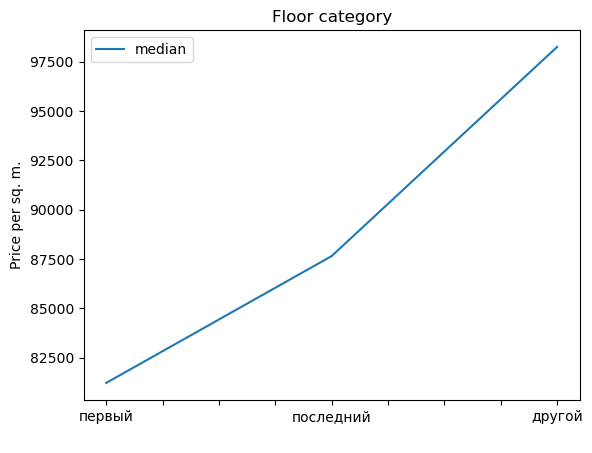

In [18]:
floor_category = data.query('floor_category != "неизвестно"').pivot_table(index = 'floor_category', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
floor_category.columns = ['mean', 'count', 'median']
floor_category=floor_category.sort_values(by='median', ascending=True)
floor_category.plot(y = 'median')
plt.title('Floor category')
plt.xlabel(" ")
plt.ylabel("Price per sq. m.")
plt.show()

**Conclusion**

Apartments on the ground floor are priced 13% lower than apartments on the top floor. At the same time, apartments located on other floors are the most expensive

**Dependance on the day the ad is posted**

                            mean  count   median
weekday_exposition                              
0                   99150.845662   3596  94666.5
1                   99637.851887   4159  95526.0
2                   99381.120415   3953  95410.0
3                   99635.070608   4263  95000.0
4                   98875.020603   3980  94607.5
5                   98931.809845   1930  93534.0
6                   97419.444379   1690  94579.5


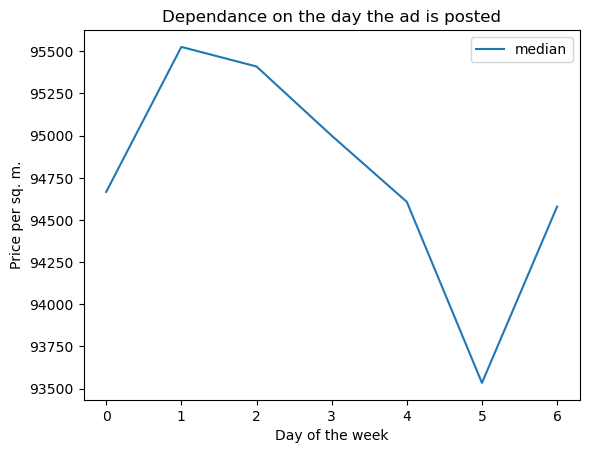

In [19]:
weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
weekday_exposition.columns = ['mean', 'count', 'median']
weekday_exposition.plot(y = 'median')
print(weekday_exposition)
plt.title('Dependance on the day the ad is posted')
plt.xlabel("Day of the week")
plt.ylabel("Price per sq. m.")
plt.show()

**Conclusion**

Lowest prices per sq. m - from Friday to Sunday, and the highest - from Monday to Wednesday. Perhaps more expensive apartments are offered by realtors only on weekdays, and on weekends by private sellers.

**Dependance on the month the ad is posted**

                           mean  count   median
month_exposition                               
1                  99540.185284   1495  95180.0
2                  98753.090909   2629  95000.0
3                  98865.417998   2567  95238.0
4                 101738.693800   2371  96385.0
5                  98481.281890   1270  92776.5
6                  97525.186073   1752  92679.0
7                  98358.214158   1681  95000.0
8                 100024.122696   1736  95960.5
9                 100395.049645   1974  95548.0
10                 97667.598011   2112  94165.5
11                 99092.969890   2358  95575.5
12                 99115.096556   1626  94130.0


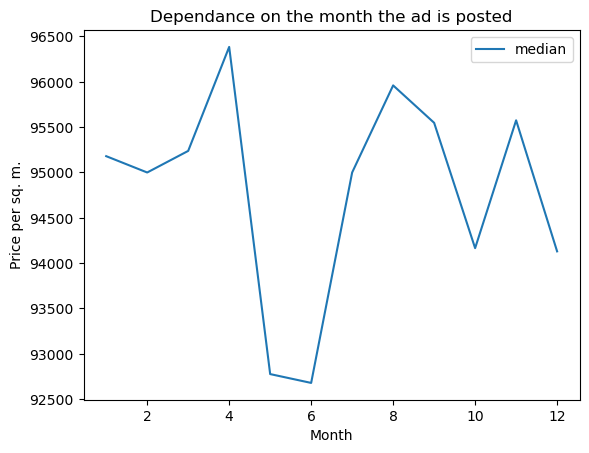

In [20]:
month_exposition = data.pivot_table(index = 'month_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
month_exposition.columns = ['mean', 'count', 'median']
month_exposition.plot(y = 'median')
print(month_exposition)
plt.title('Dependance on the month the ad is posted')
plt.xlabel("Month")
plt.ylabel("Price per sq. m.")
plt.show()

**Conclusion**

The dependence on holidays is visible - low prices in late spring and early summer, and high in early spring and autumn.

**Dependance on the year the ad is posted**

                          mean  count    median
year_exposition                                
2014             124618.669118    136  106901.5
2015             104162.059372   1179   93333.0
2016              98068.573026   2773   91666.0
2017              97284.730821   8147   92485.0
2018              97568.771128   8472   95652.0
2019             107107.991271   2864  103287.5


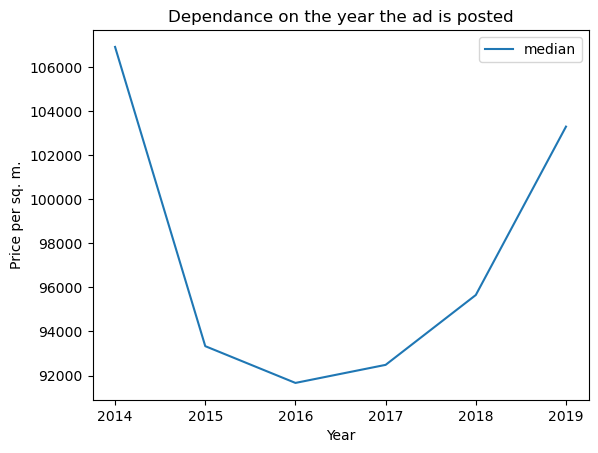

In [21]:
year_exposition = data.pivot_table(index = 'year_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
year_exposition.columns = ['mean', 'count', 'median']
year_exposition.plot(y = 'median')
print(year_exposition)
plt.title('Dependance on the year the ad is posted')
plt.xlabel("Year")
plt.ylabel("Price per sq. m.")
plt.show()

**Conclusion**

After the crisis at the end of 2014, the average price per square meter fell steadily, but in 2017 it began to grow and by 2019 the price was close to the prices of 2014 (a difference of 3.5%)

**4. Calculate the average price of one square meter in 10 localities with the largest number of advertisements. Highlight settlements with the highest and lowest cost per square meter.**

                   Количество объявлений  Средняя цена
locality_name                                         
Санкт-Петербург                    15628        114503
поселок Мурино                       554         85656
поселок Шушары                       440         78677
Всеволожск                           395         68617
Пушкин                               367        102777
Колпино                              338         75424
поселок Парголово                    327         90175
Гатчина                              305         68811
деревня Кудрово                      299         92473
Выборг                               233         58250


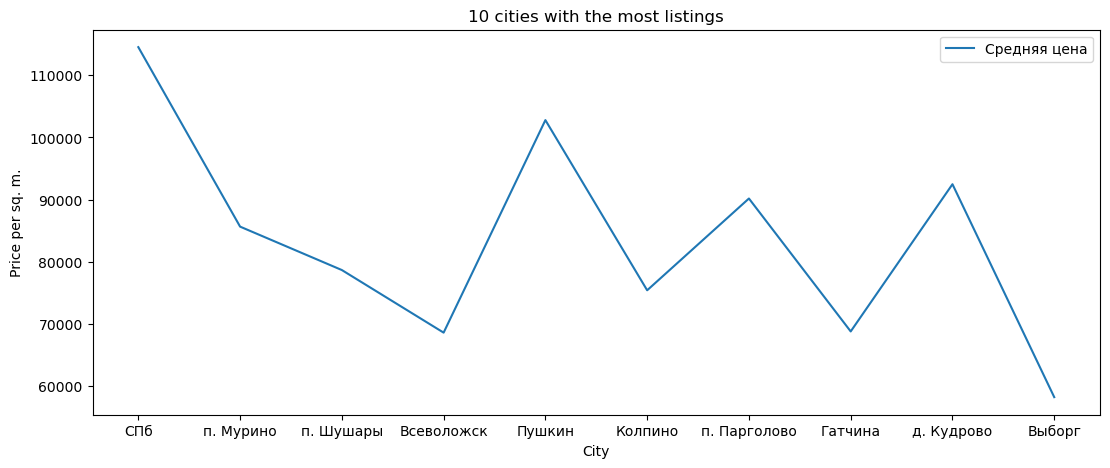

In [22]:
locality_table = data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
locality_table.columns = ['Количество объявлений', 'Средняя цена']
locality_table = locality_table.sort_values('Количество объявлений', ascending = False).head(10)
locality_table['Средняя цена']=round(locality_table['Средняя цена'])
locality_table['Средняя цена']=locality_table['Средняя цена'].astype('int')
print(locality_table)
locality_table = locality_table.sort_values('Количество объявлений', ascending = False).head(10)
names=['СПб', 'п. Мурино', 'п. Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'п. Парголово',\
'Гатчина', 'д. Кудрово', 'Выборг']
locality_table.plot(y='Средняя цена', figsize=(13, 5))
plt.xticks(np.arange(len(locality_table)), names)
plt.title('10 cities with the most listings')
plt.xlabel("City")
plt.ylabel("Price per sq. m.")
plt.show()

In [23]:
print('Max price:')
print(locality_table[locality_table['Средняя цена']==locality_table['Средняя цена'].max()])
print('Min price:')
print(locality_table[locality_table['Средняя цена']==locality_table['Средняя цена'].min()])

Max price:
                 Количество объявлений  Средняя цена
locality_name                                       
Санкт-Петербург                  15628        114503
Min price:
               Количество объявлений  Средняя цена
locality_name                                     
Выборг                           233         58250


**Conclusion**

The largest number of advertisements in the Leningrad region, of course, is in St. Petersburg. Average price per sq. m. is the highest in the region, almost 2 times higher than in Vyborg.

**5. Previously, you calculated the distance to the center in kilometers. Now select apartments in St. Petersburg using the locality_name column and calculate the average price per kilometer. Describe how the cost of objects depends on the distance to the city center.**

                price_per_square_meter
cityCenters_km                        
0                        253433.000000
1                        175126.657609
2                        154414.859532
3                        121044.355685
4                        133020.248521
5                        139891.910695
6                        149937.499179
7                        155989.235012
8                        124912.091062
9                        113086.595601
10                       112689.195531
11                       108562.387894
12                       107493.064255
13                       108162.518213
14                       104260.039185
15                       104266.719029
16                       100533.408082
17                        96597.212911
18                        96361.839080
19                        98652.305732
20                       103081.255319
21                        94469.136752
22                        91329.965347
23                       

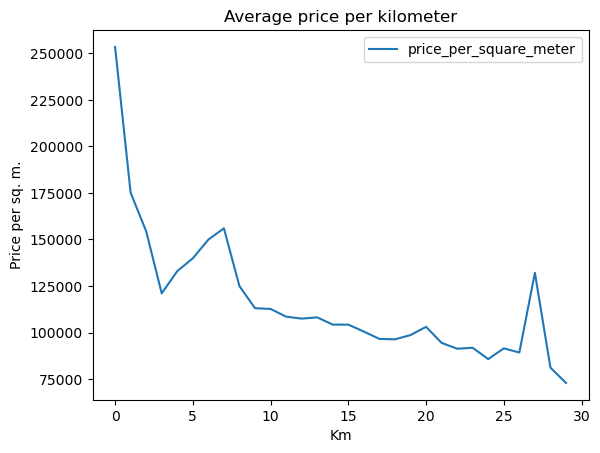

In [24]:
table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_km !=1000').pivot_table(index = 'cityCenters_km', values = 'price_per_square_meter', aggfunc = 'mean')
table_km.plot()
print(table_km)
plt.title('Average price per kilometer')
plt.xlabel("Km")
plt.ylabel("Price per sq. m.")
plt.show()

**Conclusion**

The price decreases as you move away from the center, with the exception of three peaks - 7, 20 and 27 km.

### Conclusion

The cost of an apartment is most affected by:
1. Number of rooms (1-2 room apartments are more popular than 3 rooms)
2. Month of accommodation (During the holiday season, prices are lower)
3. Year of placement (Economic situation in the country)
4. Floor (Apartments on the first and last floors are not particularly attractive due to potential noise on the 1st floor and problems with the roof on the last)